In [24]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [3]:
test_df = pd.read_csv("test.csv")
test_df

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [5]:
train_df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [6]:
# Defining a function to categorize features
def categorize_features(df):
    # creating empty lists
    continuous_features = []
    binary_features = []

    for col in df.columns:
        if df[col].nunique() <= 2: # if the number of unique values per feature is either equal or smaller than 2, it gets appended to the binary_features list
            binary_features.append(col)
        else:
            continuous_features.append(col) # In case it has more unique values than 2, it get appended to the continuous_feature list
    return continuous_features, binary_features

In [7]:
# Creating lists with the function
continuous_features, binary_features = categorize_features(train_df)
# Printing feature categorizations
print('\n')
print('Continuous features:')
print(continuous_features)
print('\n')
print('Binary features:')
print(binary_features)



Continuous features:
['nums/length username', 'fullname words', 'nums/length fullname', 'description length', '#posts', '#followers', '#follows']


Binary features:
['profile pic', 'name==username', 'external URL', 'private', 'fake']


In [8]:
# Creating another dataframe to label real and fake accounts
legend_df = train_df.copy()
legend_df['fake'] = legend_df['fake'].replace({0: 'Real Accounts', 1: "Fake Accounts"})

# plotting barplots for each binary feature

def create_barplots(df, legend_df):
    for feature in binary_features:
        fig = px.histogram(train_df, x=feature, color=legend_df['fake'],
                           color_discrete_sequence=['#636EFA','#EF553B'],
                           barmode='group', template='plotly_white',labels={'color': 'Real/Fake'})

        fig.update_layout(title=f'{feature}?',
                          xaxis_title=feature, yaxis_title='Count', xaxis=dict(tickmode='array',
                                                                               tickvals=[0, 1],
                                                                               ticktext=['No', 'Yes']
                                                                               ),
                     height = 650)

        fig.show()

In [9]:
create_barplots(train_df , legend_df)

In [10]:
fig = px.pie(legend_df, names='fake', title='Target variable distribution', color_discrete_sequence = ['#636EFA','#EF553B'])
fig.update_layout(template = 'ggplot2')
fig.show()

<ipython-input-11-d98ea52da54b>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




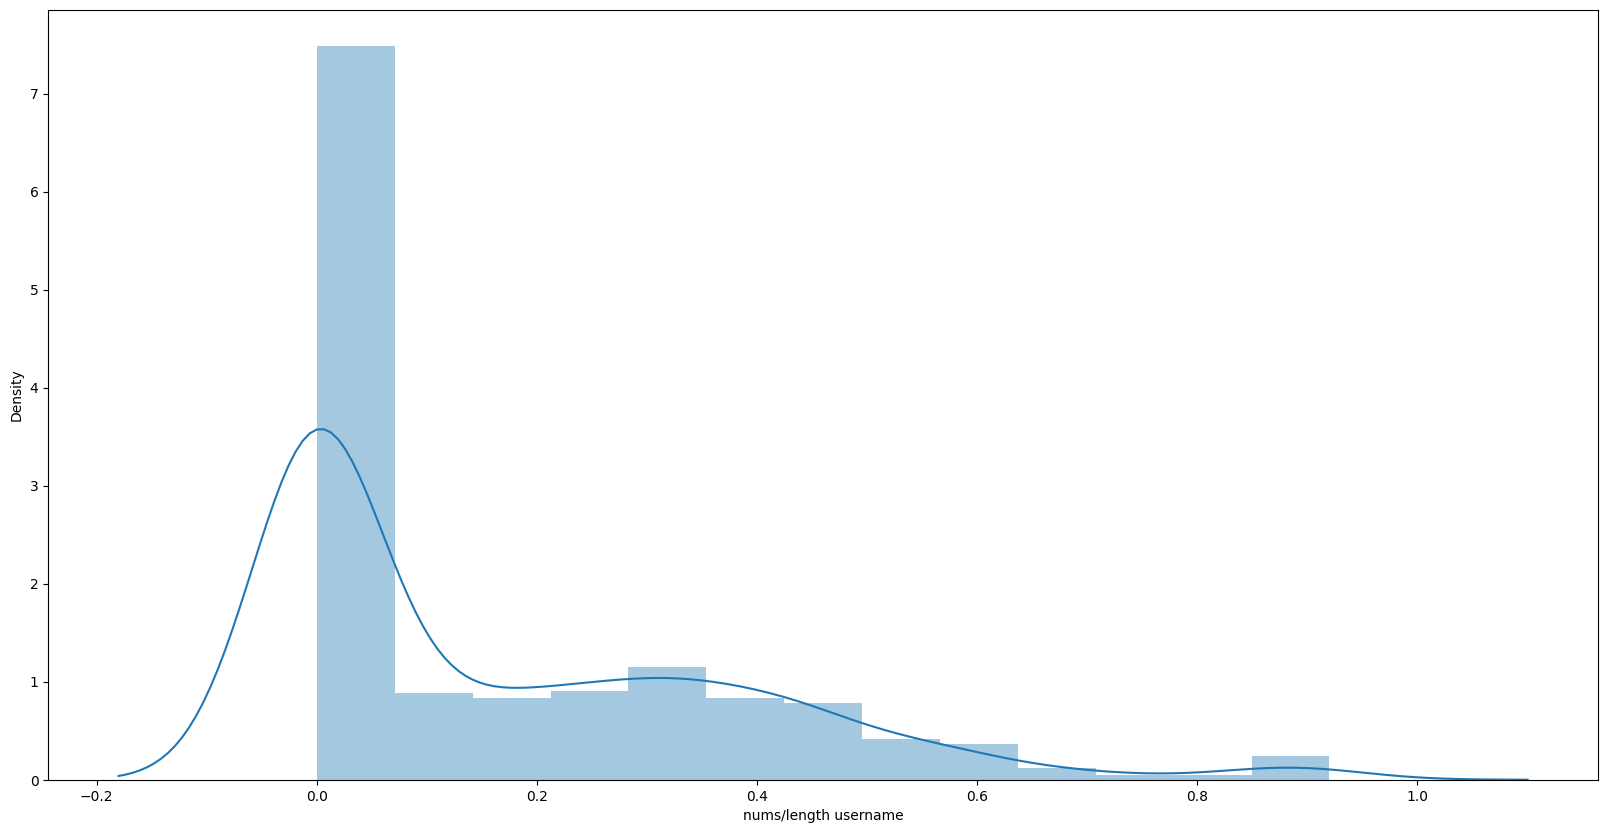

In [11]:
# Visualize the data
plt.figure(figsize = (20, 10))
sns.distplot(train_df['nums/length username'])
plt.show()

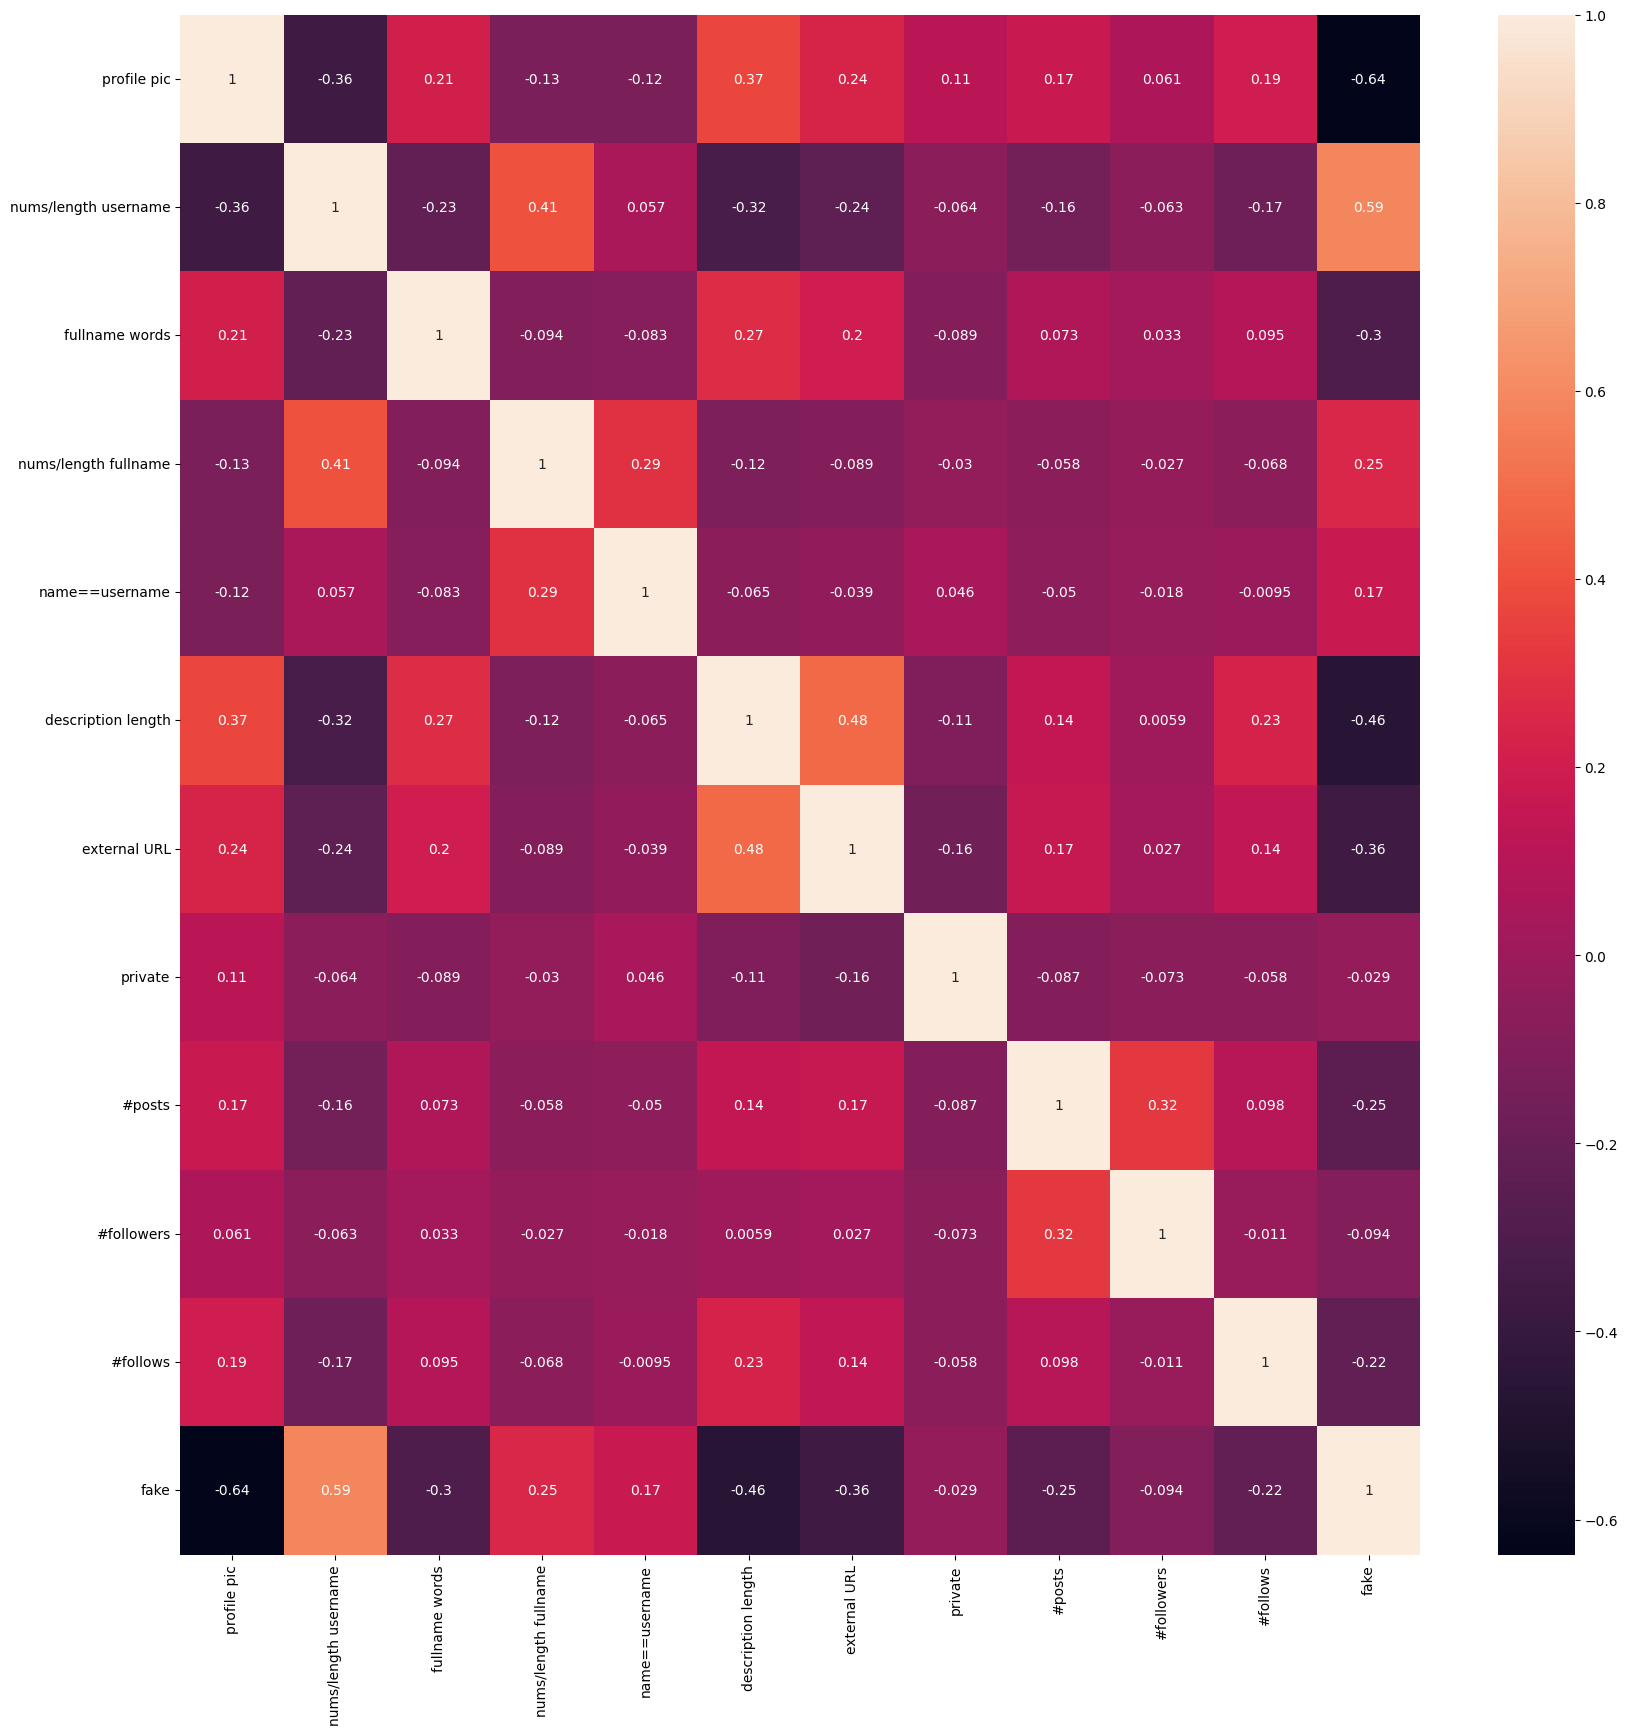

In [12]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = train_df.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
plt.show()

In [13]:
# Training and testing dataset (inputs)
X_train = train_df.drop(columns = ['fake'])
X_test = train_df.drop(columns = ['fake'])
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [14]:
# Training and testing dataset (Outputs)
y_train = train_df['fake']
y_test = train_df['fake']
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [15]:
# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [16]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [17]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dropout_1 (Dropout)         (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 25)                3775      
                                                                 
 dropout_2 (Dropout)         (None, 25)                0

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
epochs_hist = model.fit(X_train, y_train, epochs = 100,  verbose = 1, validation_split = 0.1)

Epoch 1/100
17/17 [==============================] - 4s 55ms/step - loss: 0.5685 - accuracy: 0.7239 - val_loss: 0.3094 - val_accuracy: 0.8793
Epoch 2/100
17/17 [==============================] - 0s 19ms/step - loss: 0.3283 - accuracy: 0.8900 - val_loss: 0.2499 - val_accuracy: 0.8966
Epoch 3/100
17/17 [==============================] - 0s 13ms/step - loss: 0.2637 - accuracy: 0.9131 - val_loss: 0.1873 - val_accuracy: 0.9138
Epoch 4/100
17/17 [==============================] - 0s 22ms/step - loss: 0.2660 - accuracy: 0.9073 - val_loss: 0.2079 - val_accuracy: 0.9138
Epoch 5/100
17/17 [==============================] - 0s 12ms/step - loss: 0.2400 - accuracy: 0.9131 - val_loss: 0.2206 - val_accuracy: 0.8793
Epoch 6/100
17/17 [==============================] - 0s 18ms/step - loss: 0.2401 - accuracy: 0.9093 - val_loss: 0.1775 - val_accuracy: 0.9310
Epoch 7/100
17/17 [==============================] - 0s 17ms/step - loss: 0.2273 - accuracy: 0.9151 - val_loss: 0.2214 - val_accuracy: 0.8966
Epoch 

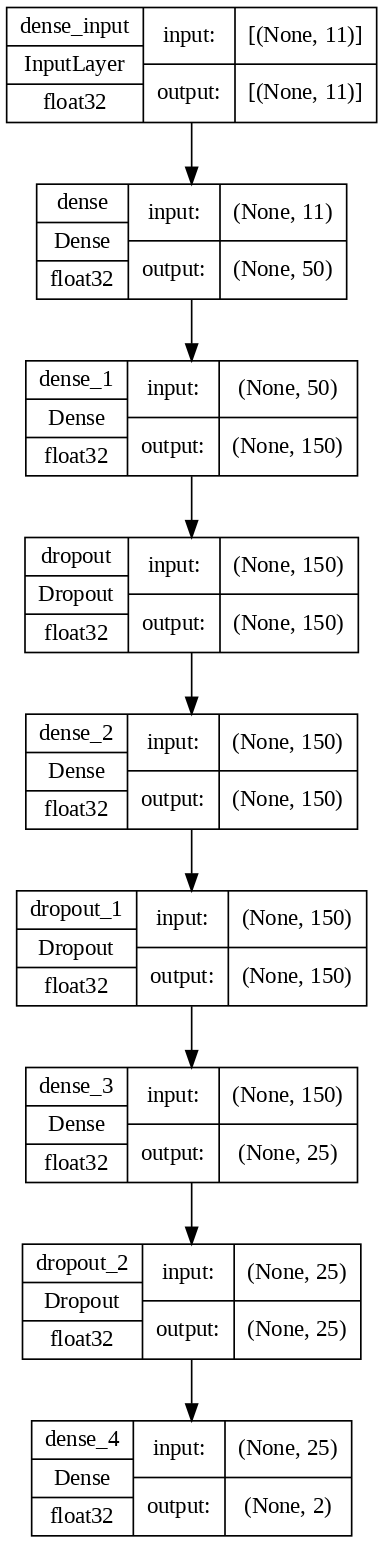

In [27]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

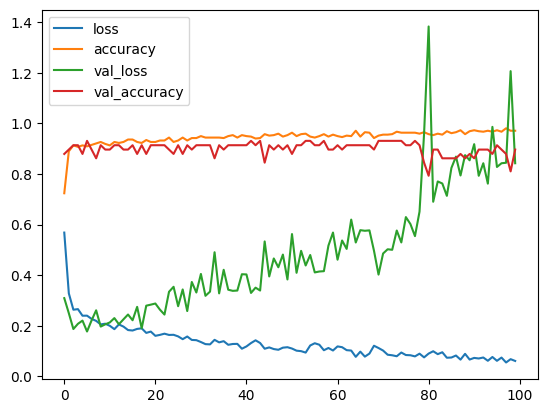

In [21]:
for key , value in epochs_hist.history.items():
  plt.plot(value , label = key )
plt.legend()
plt.show()


In [25]:
predicted = model.predict(X_test)
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in y_test:
    test.append(np.argmax(i))

18/18 [==============================] - 0s 2ms/step
